<a href="https://colab.research.google.com/github/PedroAlmeida18/Rede_Neural_Convolucionauis/blob/Aula_01/Rede_Neural_Convolucional_AULA010.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Rede Neural Convolucional - AULA 01
Conceitos

MLP :  Número de  neurônios na camada anterior e  número na camada atual dará as conexões pela multiplicação, chamadas de pesos.
     - SÓ ACEITA ENTRDAS DE 1D, LINEARLIZAR A IMAGEM
     - A PROXIMA CAMADA DEVE SER DIRETAMENTE PROPORCIONAL
     - POR UM ALTO CUSTO PARA ARAMZENAR A PENAS A IMAGAME O MLÇP NÃO SERÁ USADO.
Convolução (CNN) :
                  - O Númerto de parametros da rede não é mais vinculado ao tamanho da entrada
                  - interpreta a imagem de forma mais intuitiva
                  -

# ARQUITETURA DA CNN
- TRABALHA COM VOLUMES 3D(ALTURA, LARGURA E PROFUNDIDADE)

- PROFUNDIDDAE : Canais de cor, mapa de características.
- Neuronios(3D) : possuem campo de visão limitado.
- CNN alterna em transformação e subamostragem.
- Camadas comuns : Convolucional(conv), Polling(Poll), Totalmente Concetada(FC).
- Aprendizado hierarquico





In [2]:
#Datasets
import matplotlib.pyplot as plt
from matplotlib import patches
import numpy as np

import torch
from torchvision import datasets, transforms


In [6]:
#dataset MINIST de digitos escritos a mão para reconhecimento do padrão em imagens, será dado por um dado, rotulo
MNIST = datasets.MNIST('.',train=False,
                       transform=transforms.ToTensor(),
                        download=True)


(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [10]:
dado, rotulo = MNIST[0]
print(type(dado), type(rotulo))

<class 'torch.Tensor'> <class 'int'>


#plot de amostras do dataset

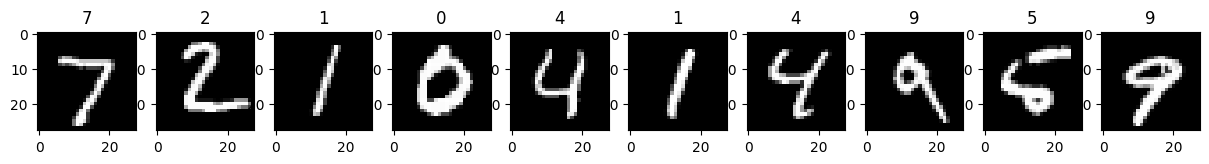

In [11]:
fig, axs = plt.subplots(1,10,figsize=(15,4))
for i in range(10):
  dado, rotulo = MNIST[i]
  axs[i].imshow(dado[0],cmap='gray')
  axs[i].set_title(str(rotulo))

A ultima camada deve ser uma de mlp conectada com a anterior cada cada digito

#Detecção
- Uso do dataset PascalVOC2012

In [ ]:
VOC = datasets.VOCDetection('.',image_set='train', download=True,transform=transforms.ToTensor(),)

 52%|█████▏    | 1036910592/1999639040 [00:49<00:44, 21461855.38it/s]

observar o tipo

In [ ]:
dado, rotulo = VOC[0]
print(type(dado), type(rotulo))